<a href="https://colab.research.google.com/github/Sayed-Hossein-Hosseini/A_Journey_into_the_Depths_of_Neural_Networks/blob/master/Union_of_Neurons_in_a_Hidden_Layer_in_a_Binary_Style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Union of Neurons in a Hidden Layer in a Binary Style**

## **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from a_neuron_dancing_in_logistic_regression_style import NeuralNetwork, DenseLayer

## **Loading Dataset and Normalization**

In [2]:
if __name__ == "__main__":
    # Load in the data
    cifar10 = tf.keras.datasets.cifar10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    X_train, X_test = X_train / 255.0, X_test / 255.0

    print(X_train.shape)
    print(X_test.shape)

    print(y_train.shape)
    print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


## **Relabeling Data**

In [3]:
if __name__ == "__main__":
    # Label 0 is for airplane
    y_train = np.where(y_train == 0, 0, 1)
    y_test = np.where(y_test == 0, 0, 1)

    print("y_train:")
    print(y_train[160:170])

    print("y_test:")
    print(y_test[160:170])

y_train:
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]
y_test:
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


## **Flatten and Reshape Images**

In [4]:
if __name__ == "__main__":
    # reshape images from (32, 32, 3) to (3072,)
    X_train = X_train.reshape((X_train.shape[0], -1))  # (50000, 3072)
    X_test = X_test.reshape((X_test.shape[0], -1))     # (10000, 3072)

    y_train, y_test = y_train.flatten(), y_test.flatten() # (50000,  -   10000,)

## **Main**


In [5]:
if __name__ == "__main__":
    model = NeuralNetwork()
    model.add(DenseLayer(3072, 64, activation='sigmoid'))
    model.add(DenseLayer(64, 1, activation='sigmoid'))

    model.train(X_train, y_train, epochs=1000, lr=0.01, batch_size=64)
    predictions = model.predict(X_test)

Epoch 0: Loss = 0.3605
Epoch 10: Loss = 0.3070
Epoch 20: Loss = 0.2901
Epoch 30: Loss = 0.2811
Epoch 40: Loss = 0.2750
Epoch 50: Loss = 0.2716
Epoch 60: Loss = 0.2687
Epoch 70: Loss = 0.2669
Epoch 80: Loss = 0.2660
Epoch 90: Loss = 0.2655
Epoch 100: Loss = 0.2650
Epoch 110: Loss = 0.2649
Epoch 120: Loss = 0.2649
Epoch 130: Loss = 0.2649
Epoch 140: Loss = 0.2649
Epoch 150: Loss = 0.2647
Epoch 160: Loss = 0.2647
Epoch 170: Loss = 0.2643
Epoch 180: Loss = 0.2642
Epoch 190: Loss = 0.2637
Epoch 200: Loss = 0.2634
Epoch 210: Loss = 0.2628
Epoch 220: Loss = 0.2626
Epoch 230: Loss = 0.2622
Epoch 240: Loss = 0.2612
Epoch 250: Loss = 0.2610
Epoch 260: Loss = 0.2603
Epoch 270: Loss = 0.2597
Epoch 280: Loss = 0.2592
Epoch 290: Loss = 0.2587
Epoch 300: Loss = 0.2583
Epoch 310: Loss = 0.2577
Epoch 320: Loss = 0.2569
Epoch 330: Loss = 0.2565
Epoch 340: Loss = 0.2561
Epoch 350: Loss = 0.2558
Epoch 360: Loss = 0.2555
Epoch 370: Loss = 0.2551
Epoch 380: Loss = 0.2547
Epoch 390: Loss = 0.2541
Epoch 400: 

## **Calculation and Evaluation**

Confusion Matrix:
 [[ 319  681]
 [ 116 8884]]


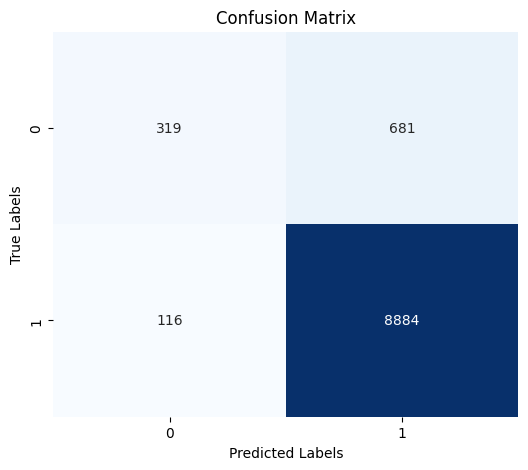

F1 Score: 0.957069754915163
Accuracy: 0.9203
Precision: 0.9288029273392577
Recall: 0.9871111111111112


In [6]:
if __name__ == "__main__":
    # Predictions
    predictions_binary = (predictions >= 0.5).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions_binary)
    print("Confusion Matrix:\n", cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # F1 Score
    f1 = f1_score(y_test, predictions_binary)
    print("F1 Score:", f1)

    # Optional: Accuracy, Precision, Recall
    acc = accuracy_score(y_test, predictions_binary)
    prec = precision_score(y_test, predictions_binary)
    rec = recall_score(y_test, predictions_binary)

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)